# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. 

Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. 

The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. 

Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


# finding the optimal number of bins
https://stats.stackexchange.com/questions/798/calculating-optimal-number-of-bins-in-a-histogram#:~:text=The%20bin%2Dwidth%20is%20set,min%20is%20the%20minimum%20value.&text=If%20you%20use%20too%20few,portray%20the%20data%20very%20well.

In [4]:
max(medical.charges)

63770.42801

In [5]:
min(medical.charges)

1121.8739

In [6]:
(max(medical.charges) - min(medical.charges)) 

62648.554110000005

In [7]:
IQR = (medical.charges.quantile(q=0.75) - medical.charges.quantile(q=0.25))
IQR

11899.625365

In [8]:
h = 2 * IQR / len(medical.charges) ** (1/3)
h

2159.7886104035842

In [9]:
(max(medical.charges) - min(medical.charges))  / h

29.006799002562254

In [10]:
# therefore use 29 bins

__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

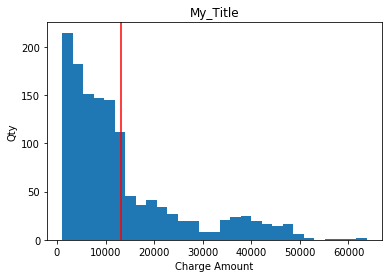

In [11]:
_ = plt.hist(medical.charges, bins=29)
_ = plt.title('My_Title')
_ = plt.xlabel('Charge Amount')
_ = plt.ylabel('Qty')

_ = plt.axvline(np.mean(medical.charges), color='r')

plt.show()

In [12]:
np.mean(medical.charges)

13270.422265141257

In [13]:
#std dev, population
np.std(medical.charges)

12105.484975561605

In [14]:
#std dev, sample
np.std(medical.charges, ddof=1)

12110.011236693994

__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? 

And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

In [15]:
# we should use the t-test in this case because:
# 1) we do not have enough information about the population (we are assuming it is a random sample) 
# so we are missing things like: population mean, and population std dev, population distribution.

# we should *not* use the Z test/score for the same reasons listed above.

# https://www.statisticshowto.com/probability-and-statistics/t-test/

In [16]:
# H0 the avg =< 12,000
# HA the avg is > 12,000

# we would like to know whether or not to reject the null hypothese (H0)

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

# =========


A one-tailed test will test either 

if the mean is significantly greater than x or if the mean is significantly less than x, but not both.

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/#:~:text=For%20example%2C%20we%20may%20wish,mean%20significantly%20less%20than%20x.

https://www.statisticshowto.com/probability-and-statistics/confidence-interval/#CISample

In [17]:
# p = 0.95
# df = len(medical.charges) - 1
# value = t.ppf(p,df,loc=np.mean(medical.charges),scale=np.std(medical.charges))
# value

# https://www.youtube.com/watch?v=pTmLQvMM-1M

__A:__

In [18]:
step1 = len(medical.charges) - 1
step1

1337

In [19]:
step2 = (1 - 0.95) / 2
step2

0.025000000000000022

In [20]:
# step3 = t.ppf(q=0.95, df=step1, loc=np.mean(medical.charges),scale=np.std(medical.charges))
step3 = t.ppf(q=0.95, df=step1)
step3

1.6459941145571317

In [21]:
step4 = np.std(medical.charges) / np.sqrt(len(medical.charges))
step4

330.943713906084

In [22]:
step5 = step3 * step4
step5

544.7314053390934

In [23]:
step6 = np.mean(medical.charges) - step5
step6

12725.690859802164

In [24]:
step7 = np.mean(medical.charges) + step5
step7

13815.15367048035

In [25]:
# therefore it is 13270 +/- 544.73
# (12725.69, 13815.15)

In [26]:
p = 1 - t.cdf(step3, df=step1)
p

0.050000000000000044

In [27]:
# critical value (t distribution) is:
# 1.6459941145571317

In [28]:
# mean charge is:
# (12725.69, 13815.15)

In [29]:
# Therefore this is greater than $12,000 so we reject the null hypothesis. 
# The director has nothing to worry about.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. 

Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__

# [jh] Hypothesis Testing

H 0 (null): they are charged *differently* (insurance vs. no-insurance)

H A (alt): they are charged same (insurance vs. no-insurance)

https://www.youtube.com/watch?v=pTmLQvMM-1M

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). 

For the manual approach, calculate the value of the test statistic and then its probability (the p-value). 

Verify you get the same results from both.

__A:__ 

# assumptions:

- normal distribution in both samples
- similar variance
- datapoints (roughly same amount, 20-30+)

In [30]:
insurance_yes = medical[medical.insuranceclaim == 1]
insurance_yes

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.90,0,1,3,16884.92400,1
1,18,1,33.77,1,0,2,1725.55230,1
4,32,1,28.88,0,0,1,3866.85520,1
6,46,0,33.44,1,0,2,8240.58960,1
10,25,1,26.22,0,0,0,2721.32080,1
...,...,...,...,...,...,...,...,...
1330,57,0,25.74,2,0,2,12629.16560,1
1331,23,0,33.40,0,0,3,10795.93733,1
1334,18,0,31.92,0,0,0,2205.98080,1
1335,18,0,36.85,0,0,2,1629.83350,1


In [31]:
insurance_yes.charges.describe()

count      783.000000
mean     16423.928277
std      14045.928419
min       1131.506600
25%       5733.288925
50%      11538.421000
75%      23484.788875
max      63770.428010
Name: charges, dtype: float64

In [32]:
insurance_no = medical[medical.insuranceclaim == 0]
insurance_no

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
5,31,0,25.740,0,0,2,3756.62160,0
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
...,...,...,...,...,...,...,...,...
1324,31,1,25.935,1,0,1,4239.89265,0
1328,23,0,24.225,2,0,0,22395.74424,0
1332,52,0,44.700,3,0,3,11411.68500,0
1333,50,1,30.970,3,0,1,10600.54830,0


In [33]:
insurance_no.charges.describe()

count      555.000000
mean      8821.421892
std       6446.510127
min       1121.873900
25%       4445.337575
50%       6933.242250
75%      11424.211575
max      36910.608030
Name: charges, dtype: float64

In [34]:
# pooled standard dev, simple

SD1 = np.std(insurance_yes.charges)
SD2 = np.std(insurance_no.charges)

var1 = SD1 ** 2
var2 = SD2 ** 2

SDpooled_simple = np.sqrt((var1 + var2)/2)
SDpooled_simple

10920.594196777447

In [35]:
# pooled standard dev, cohen formula
# https://www.statisticshowto.com/pooled-standard-deviation

numerator_cohen = ((len(insurance_yes.charges)-1) * var1) + ((len(insurance_no.charges)-1) * var2)
denom_cohen = len(insurance_yes.charges) + len(insurance_no.charges) - 2

SDpooled_cohen = np.sqrt(numerator_cohen/denom_cohen)
SDpooled_cohen

11512.282899205744

In [36]:
x0 = np.mean(insurance_yes.charges)
x1 = np.mean(insurance_no.charges)

numerator_ttest = x0 - x1
denom_ttest = np.sqrt((1 / len(insurance_yes.charges)) + (1 / len(insurance_no.charges)))

In [37]:
ttest_simple = numerator_ttest / (SDpooled_simple * denom_ttest )
ttest_simple

12.546131642261903

In [38]:
ttest_cohen = numerator_ttest / (SDpooled_cohen * denom_ttest )
ttest_cohen

11.901306943555385

# =========
ask blake why the import didn't work?

In [39]:
# from scipy.stats import t
import scipy.stats

In [40]:
scipy.stats.ttest_ind(insurance_yes.charges, insurance_no.charges, axis=0, equal_var=True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

In [41]:
# Therefore we can see that the ttest cohen formula 
# is essentially the same as the formula used by the scipy stats library

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [42]:
scipy.stats.ttest_ind(insurance_yes.charges, insurance_no.charges, axis=0, equal_var=False)

Ttest_indResult(statistic=13.298031957975649, pvalue=1.1105103216309125e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. 

You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

# scipy.stats
has a zscore function. but not any built in z-test function

https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce

In [43]:
scipy.stats.zscore(a=medical.charges, axis=0, ddof=0)

array([ 0.2985838 , -0.95368917, -0.72867467, ..., -0.96159623,
       -0.93036151,  1.31105347])

# Statsmodels.Stats

Looks like there is a 3rd party library called statsmodels.stats which has a ztest function

https://www.statsmodels.org/stable/generated/statsmodels.stats.weightstats.ztest.html

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test